<a href="https://colab.research.google.com/github/caffein1371/colab/blob/master/mnist_novie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
cd /content/drive/My Drive/work/mnist_novice

/content/drive/My Drive/work/mnist_novice


In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_nome ='.')

ImportError: ignored

In [4]:
#20201219 openmlからデータsえっとをダウンロード
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,data_home=".")

In [8]:
X = mnist.data / 255
y = mnist.target

この画像データのラベルは 5 です
<class 'str'>


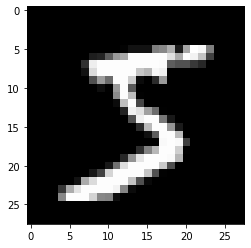

In [27]:
#可視化してみる
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(X[0].reshape(28,28), cmap='gray')
print ('この画像データのラベルは {} です'.format(y[0]))
print (type(y[0]))

In [35]:
import torch
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

#trainデータとtestデータで分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/7,random_state =0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train.astype(np.int32))
y_test = torch.LongTensor(y_test.astype(np.int32))

#Xとyをセットにしたデータセットを作成
ds_train = TensorDataset(X_train,y_train)
ds_test = TensorDataset(X_test,y_test)

#ミニバッチサイズを指定した，DataLoaderを作成
loader_train = DataLoader(ds_train,batch_size =64,shuffle =True)
loader_test = DataLoader(ds_test,batch_size =64,shuffle =False)


In [44]:
#ネットワークの構築
# keras風の書き方

from torch import nn

model = nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,10))

print (model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [42]:
pip install torch-summary

In [45]:
from torchsummary import summary

summary(model,(1,28,28))

RuntimeError: ignored

In [46]:
from torch import optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr =0.01)


In [55]:
def train(epoch):
  model.train()

  for data,targets in loader_train:

    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs,targets)

    loss.backward()
    optimizer.step()

  print ('epoch{}:終了\n'.format(epoch))


In [51]:
def test():
  model.eval()
  correct = 0

  with torch.no_grad():#微分は推論には必要ない
    for data,targets in loader_test:
      outputs = model(data)

      _,predicted = torch.max(outputs.data,1)#確率が最大のラベルを求める
      correct += predicted.eq(targets.data.view_as(predicted)).sum()

  data_num = len(loader_test.dataset)
  print ('\nテストデータの正解率: {}/{} ({:.0f}%)\n'.format(correct,data_num,100.* correct/data_num))


In [52]:
test()


テストデータの正解率: 1034/10000 (10%)



In [56]:
for epoch in range(3):
  train(epoch)
test()

epoch0:終了

epoch1:終了

epoch2:終了


テストデータの正解率: 9666/10000 (97%)



予測結果は2
この画像データの正解ラベルは2です


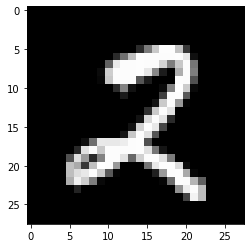

In [57]:
#例えば2018番目の画像データを推論してみる

index = 2018

model.eval()
data = X_test[index]
output = model(data)
_,predicted = torch.max(output.data,0)#ミニバッチに時は1，１枚の時は0

print ('予測結果は{}'.format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28),cmap='gray')
print ('この画像データの正解ラベルは{:.0f}です'.format(y_test[index]))

In [58]:
#chainer風の書き方
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self,n_in,n_mid,n_out):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(n_in,n_mid)
    self.fc2 = nn.Linear(n_mid,n_mid)
    self.fc3 = nn.Linear(n_mid,n_out)

  def forward(self,x):
    h1 = F.relu(self.fc1(x))
    h2 = F.relu(self.fc2(h1))
    output  = self.fc3(h2)
    return output

model = Net(n_in=28*28*1,n_mid =100,n_out=10)
print (model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)
